# Crime and public infrastructure in coastal US cities
### To what extent do elements of the urban fabric influence crime rates in major US cities?


## Part 2: Data Visualization

In [4]:
#let's start by setting our directory and importing relevant packages
setwd("C:/Users/Leonardo/Documents/TU_Delft/EPA_Year1/EPA1315/FinalProject")
install.packages(c('fitdistrplus', 'logspline', 'ggcorrplot','viridis'))
#Libraries required For this project
library(viridis)
library(ggcorrplot)
library(fitdistrplus)
library(logspline)
library(rgdal)
library(ggplot2)
library(wesanderson)
library(RColorBrewer)
library(sf)
library(ggplot2)
library(ggmap)
library(maps)
library(mapdata)
library(rgeos)
library(tidyverse)
library(lwgeom)
library(stringr)
library(dplyr)

Loading required package: ggplot2
Loading required package: MASS
Loading required package: survival
Loading required package: npsurv
Loading required package: lsei
Loading required package: sp
rgdal: version: 1.4-4, (SVN revision 833)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/Leonardo/Documents/R/win-library/3.6/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/Leonardo/Documents/R/win-library/3.6/rgdal/proj
 Linking to sp version: 1.3-1 
Linking to GEOS 3.6.1, GDAL 2.2.3, PROJ 4.9.3
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.
rgeos version: 0.5-2, (SVN revision 621)
 GEOS runtime version: 3.6.1-CAPI-1.10.1 
 Linking to sp version: 1.3-1 
 Polygon checking: TRUE 

-

In [80]:
#read files
SF_LA_PH_DC_prcnts_vars <- read.csv('Data/AllCities/Tables/SF_LA_PH_DC_BO_prcnts_vars.csv')
SF_prcnts_vars <- read.csv('Data/AllCities/Tables/SF_prcnts_vars.csv')
LA_prcnts_vars <- read.csv('Data/AllCities/Tables/LA_prcnts_vars.csv')
PH_prcnts_vars <- read.csv('Data/AllCities/Tables/PH_prcnts_vars.csv')
DC_prcnts_vars <- read.csv('Data/AllCities/Tables/DC_prcnts_vars.csv')

In [2]:
summary(SF_LA_PH_DC_prcnts_vars)

      X.1             X            treecount         crimecount      
 Min.   :   1   Min.   :   1.0   Min.   :    0.0   Min.   :     0.0  
 1st Qu.:1084   1st Qu.: 235.8   1st Qu.:  587.8   1st Qu.:   322.1  
 Median :2166   Median : 590.0   Median : 1237.4   Median :  1214.8  
 Mean   :2166   Mean   : 692.7   Mean   : 3656.1   Mean   : 15585.6  
 3rd Qu.:3249   3rd Qu.:1124.0   3rd Qu.: 3776.2   3rd Qu.: 10857.6  
 Max.   :4332   Max.   :1703.0   Max.   :92445.4   Max.   :646264.3  
   lightcount          trashcount                 CITY           km2           
 Min.   :     0.00   Min.   :   0.00   Boston       : 255   Min.   :  0.00017  
 1st Qu.:    82.61   1st Qu.:   0.00   Los Angeles  :1627   1st Qu.:  0.10273  
 Median :   395.78   Median :   0.00   Philadelphia :1703   Median :  0.24319  
 Mean   :  5026.55   Mean   :  47.91   San Francisco: 604   Mean   :  0.67973  
 3rd Qu.:  6140.77   3rd Qu.:  12.97   Washington DC: 143   3rd Qu.:  0.62088  
 Max.   :131761.57   Max.   :7

Saving 6.67 x 6.67 in image


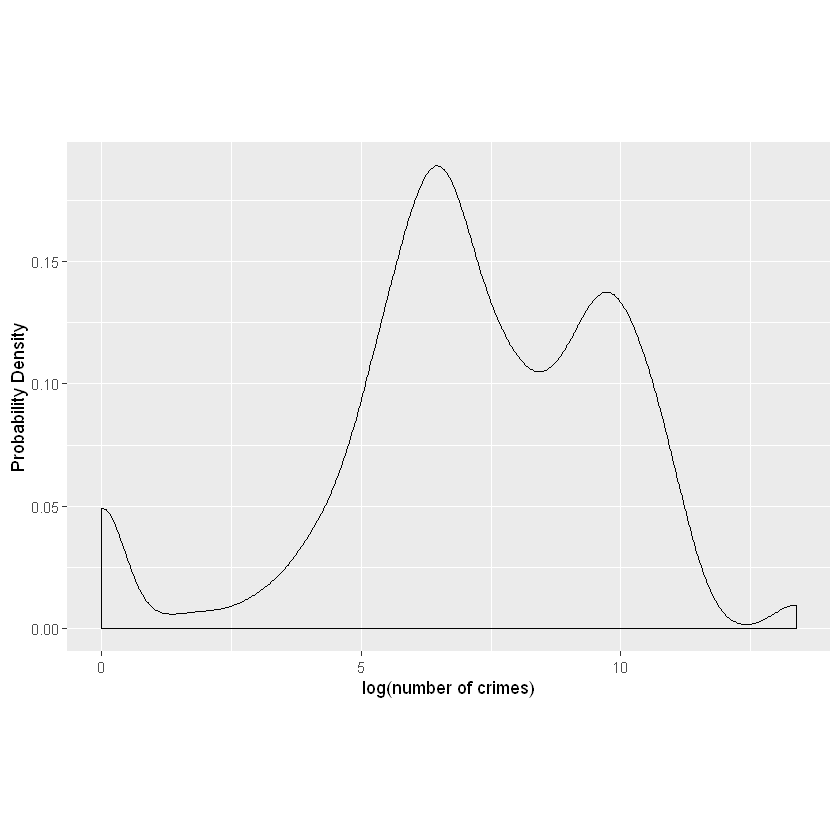

In [165]:
ggplot(SF_LA_PH_DC_prcnts_vars) + 
    geom_density(aes(x=log1p(crimecount)), alpha = 0.3)+
    ylab("Probability Density") +
    xlab("log(number of crimes)")+
    theme(aspect.ratio=2/3)
    
ggsave('graphics/AllCities/data_dist_log.png')

Saving 6.67 x 6.67 in image


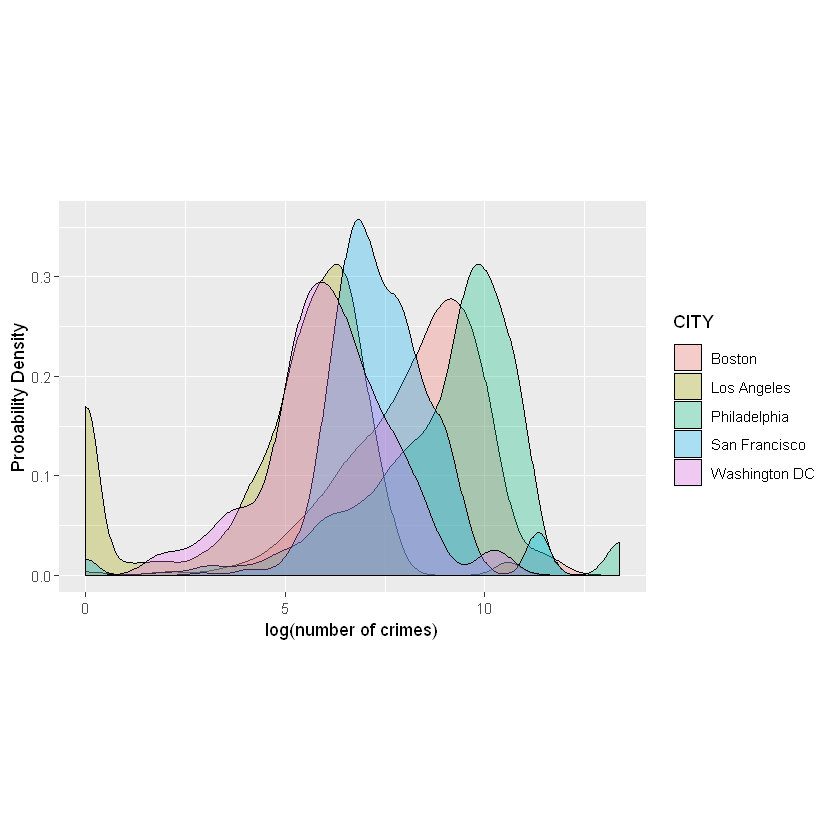

In [166]:
ggplot(SF_LA_PH_DC_prcnts_vars) + 
    geom_density(aes(x=log1p(crimecount), fill=CITY), alpha = 0.3)+
    ylab("Probability Density") +
    xlab("log(number of crimes)")+
    theme(aspect.ratio=2/3)
    
ggsave('graphics/AllCities/data_dist_log.png')

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


$title
[1] "Crime, Street Trees, Street Lights and Trash Cans in San Francisco"

$subtitle
[1] "Exploring Possible Relationships"

attr(,"class")
[1] "labels"

Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


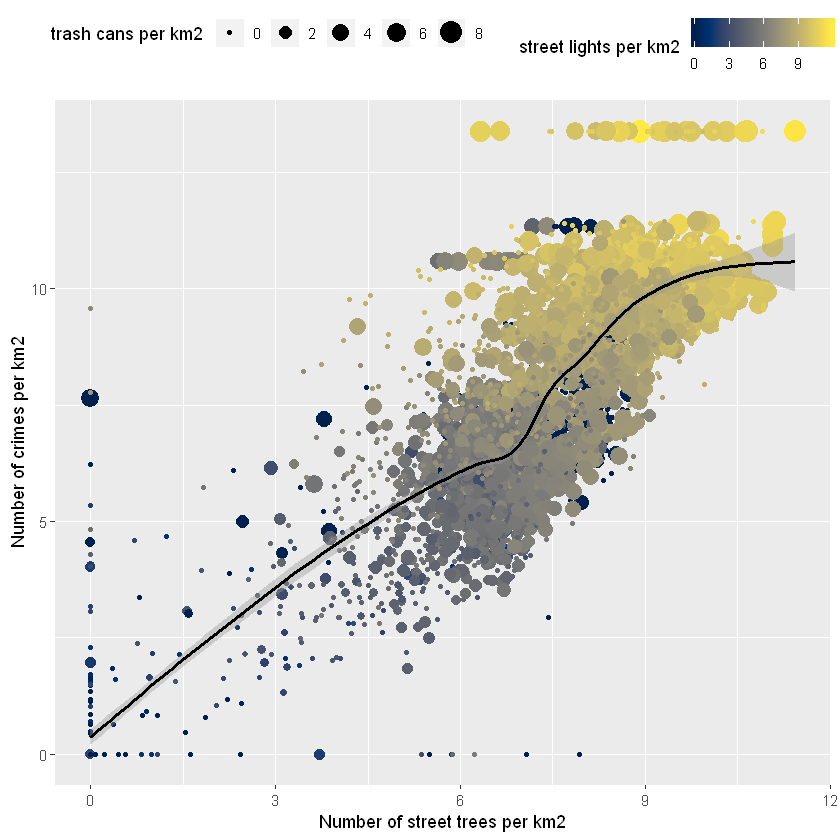

In [174]:
ggplot(SF_LA_PH_DC_prcnts_vars, 
       aes(x=log1p(treecount), y=log1p(crimecount), color=log1p(lightcount)), alpha=0.2) +
  theme(legend.position = "top")+
  geom_point(aes(size=log1p(trashcount))) +
  scale_color_viridis(option = "E") +
  geom_smooth(color='black') +
  xlab("Number of street trees per km2")+
  ylab("Number of crimes per km2")+
  labs(color = str_wrap("street lights per km2"), size=str_wrap('trash cans per km2'))
  labs(title='Crime, Street Trees, Street Lights and Trash Cans in San Francisco', subtitle='Exploring Possible Relationships')
ggsave('graphics/AllCities/AllCities_vars_log.png') 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


$title
[1] "Crime, Street Trees, Street Lights and Trash Cans in San Francisco"

$subtitle
[1] "Exploring Possible Relationships"

attr(,"class")
[1] "labels"

Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


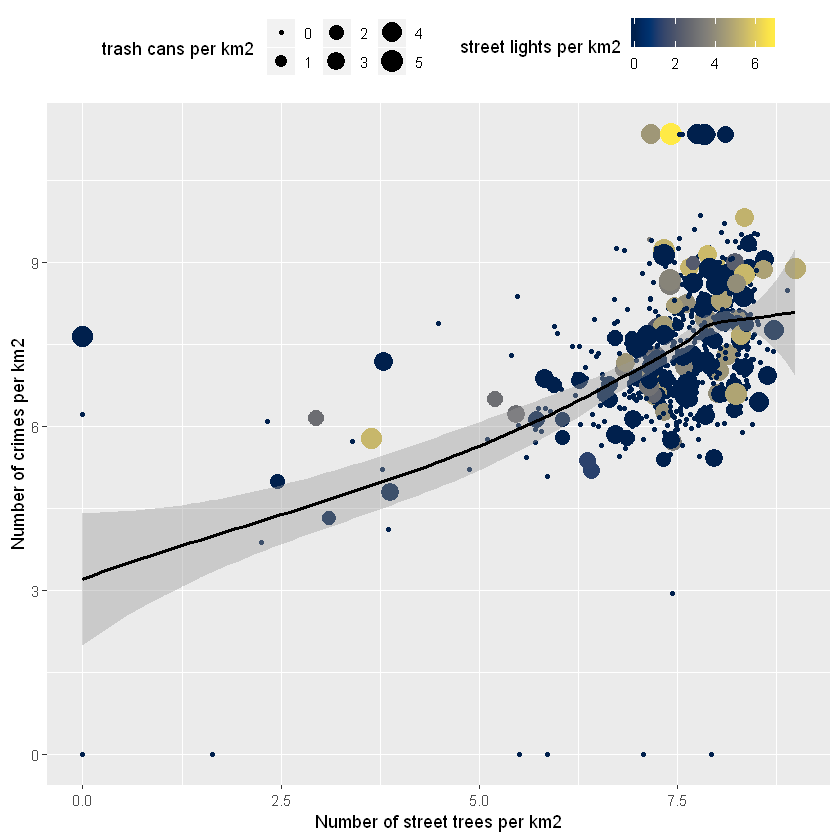

In [168]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY =='San Francisco'),
       aes(x=log1p(treecount), y=log1p(crimecount), color=log1p(lightcount)), alpha=0.2) +
  theme(legend.position = "top")+
  geom_point(aes(size=log1p(trashcount))) +
  scale_color_viridis(option = "E") +
  geom_smooth(color='black') +
  xlab("Number of street trees per km2")+
  ylab("Number of crimes per km2")+
  labs(color = str_wrap("street lights per km2"), size=str_wrap('trash cans per km2'))
  labs(title='Crime, Street Trees, Street Lights and Trash Cans in San Francisco', subtitle='Exploring Possible Relationships')
ggsave('graphics/AllCities/AllCities_vars_log.png') 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


$title
[1] "Crime, Street Trees, Street Lights and Trash Cans in San Francisco"

$subtitle
[1] "Exploring Possible Relationships"

attr(,"class")
[1] "labels"

Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


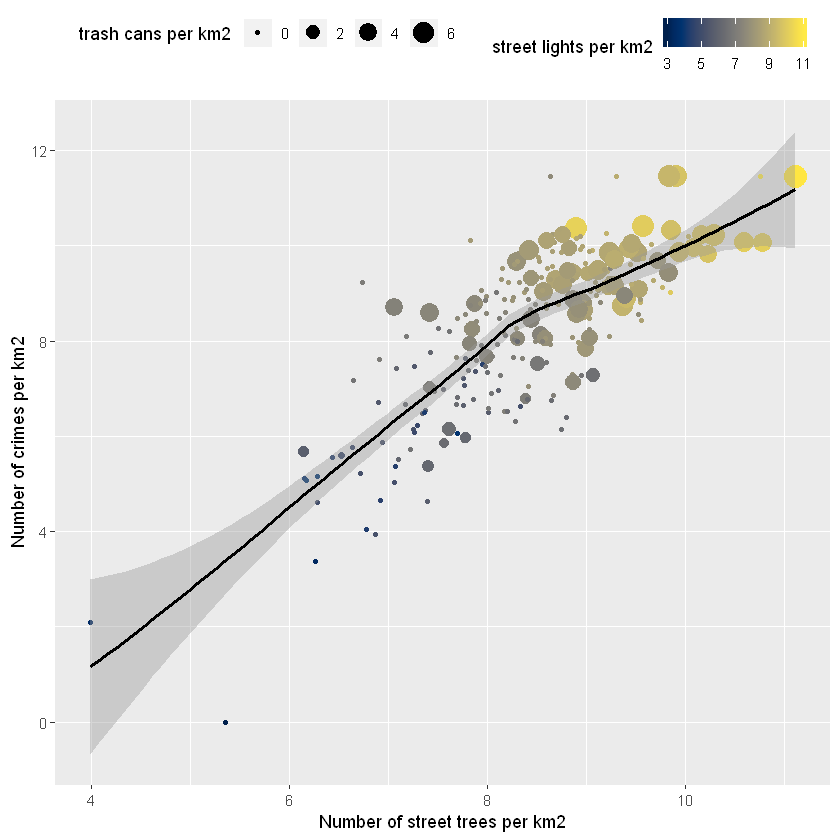

In [169]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY =='Boston'),
       aes(x=log1p(treecount), y=log1p(crimecount), color=log1p(lightcount)), alpha=0.2) +
  theme(legend.position = "top")+
  geom_point(aes(size=log1p(trashcount))) +
  scale_color_viridis(option = "E") +
  geom_smooth(color='black') +
  xlab("Number of street trees per km2")+
  ylab("Number of crimes per km2")+
  labs(color = str_wrap("street lights per km2"), size=str_wrap('trash cans per km2'))
  labs(title='Crime, Street Trees, Street Lights and Trash Cans in San Francisco', subtitle='Exploring Possible Relationships')
ggsave('graphics/AllCities/AllCities_vars_log.png') 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


$title
[1] "Crime, Street Trees, Street Lights and Trash Cans in San Francisco"

$subtitle
[1] "Exploring Possible Relationships"

attr(,"class")
[1] "labels"

Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


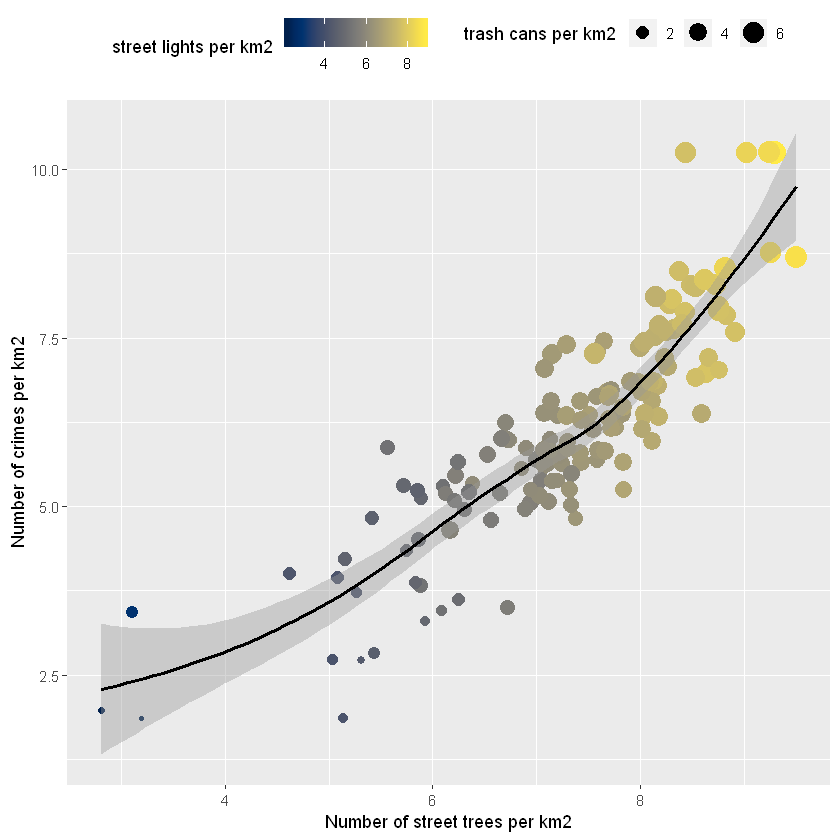

In [170]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY =='Washington DC'),
       aes(x=log1p(treecount), y=log1p(crimecount), color=log1p(lightcount)), alpha=0.2) +
  theme(legend.position = "top")+
  geom_point(aes(size=log1p(trashcount))) +
  scale_color_viridis(option = "E") +
  geom_smooth(color='black') +
  xlab("Number of street trees per km2")+
  ylab("Number of crimes per km2")+
  labs(color = str_wrap("street lights per km2"), size=str_wrap('trash cans per km2'))
  labs(title='Crime, Street Trees, Street Lights and Trash Cans in San Francisco', subtitle='Exploring Possible Relationships')
ggsave('graphics/AllCities/AllCities_vars_log.png') 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


$title
[1] "Crime, Street Trees, Street Lights and Trash Cans in San Francisco"

$subtitle
[1] "Exploring Possible Relationships"

attr(,"class")
[1] "labels"

Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


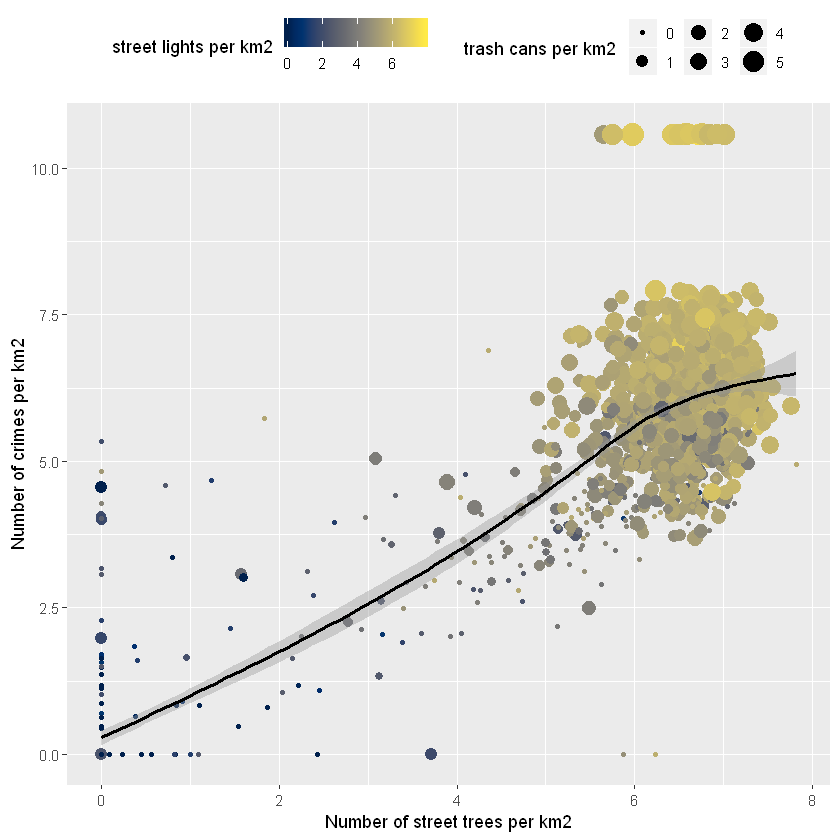

In [171]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY =='Los Angeles'),
       aes(x=log1p(treecount), y=log1p(crimecount), color=log1p(lightcount)), alpha=0.2) +
  theme(legend.position = "top")+
  geom_point(aes(size=log1p(trashcount))) +
  scale_color_viridis(option = "E") +
  geom_smooth(color='black') +
  xlab("Number of street trees per km2")+
  ylab("Number of crimes per km2")+
  labs(color = str_wrap("street lights per km2"), size=str_wrap('trash cans per km2'))
  labs(title='Crime, Street Trees, Street Lights and Trash Cans in San Francisco', subtitle='Exploring Possible Relationships')
ggsave('graphics/AllCities/AllCities_vars_log.png') 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


$title
[1] "Crime, Street Trees, Street Lights and Trash Cans in San Francisco"

$subtitle
[1] "Exploring Possible Relationships"

attr(,"class")
[1] "labels"

Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


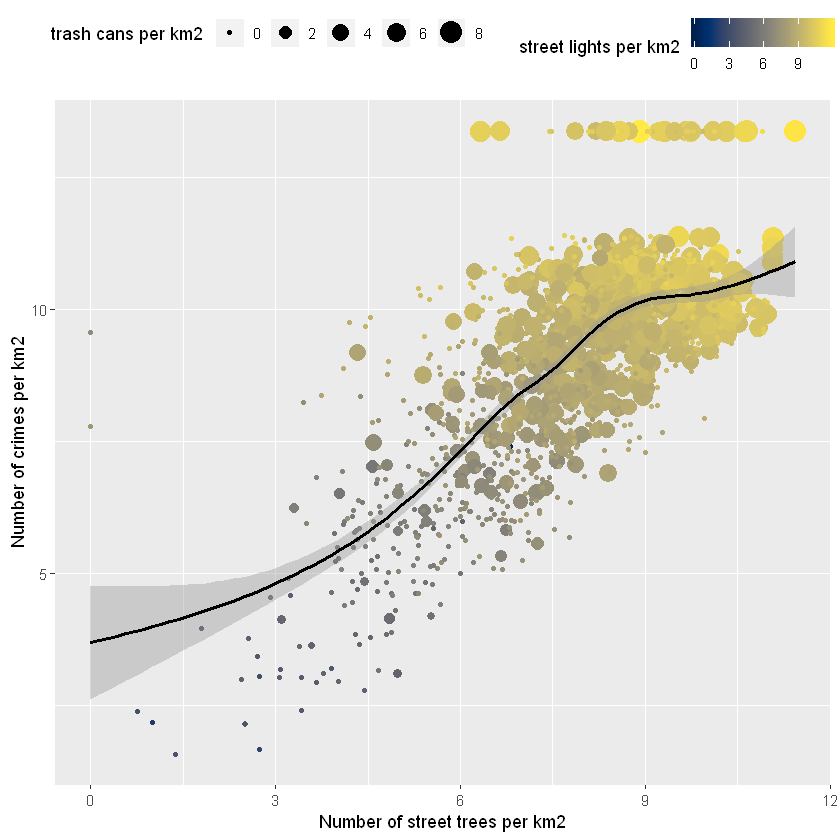

In [172]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY =='Philadelphia'),
       aes(x=log1p(treecount), y=log1p(crimecount), color=log1p(lightcount)), alpha=0.2) +
  theme(legend.position = "top")+
  geom_point(aes(size=log1p(trashcount))) +
  scale_color_viridis(option = "E") +
  geom_smooth(color='black') +
  xlab("Number of street trees per km2")+
  ylab("Number of crimes per km2")+
  labs(color = str_wrap("street lights per km2"), size=str_wrap('trash cans per km2'))
  labs(title='Crime, Street Trees, Street Lights and Trash Cans in San Francisco', subtitle='Exploring Possible Relationships')
ggsave('graphics/AllCities/AllCities_vars_log.png') 

Saving 6.67 x 6.67 in image


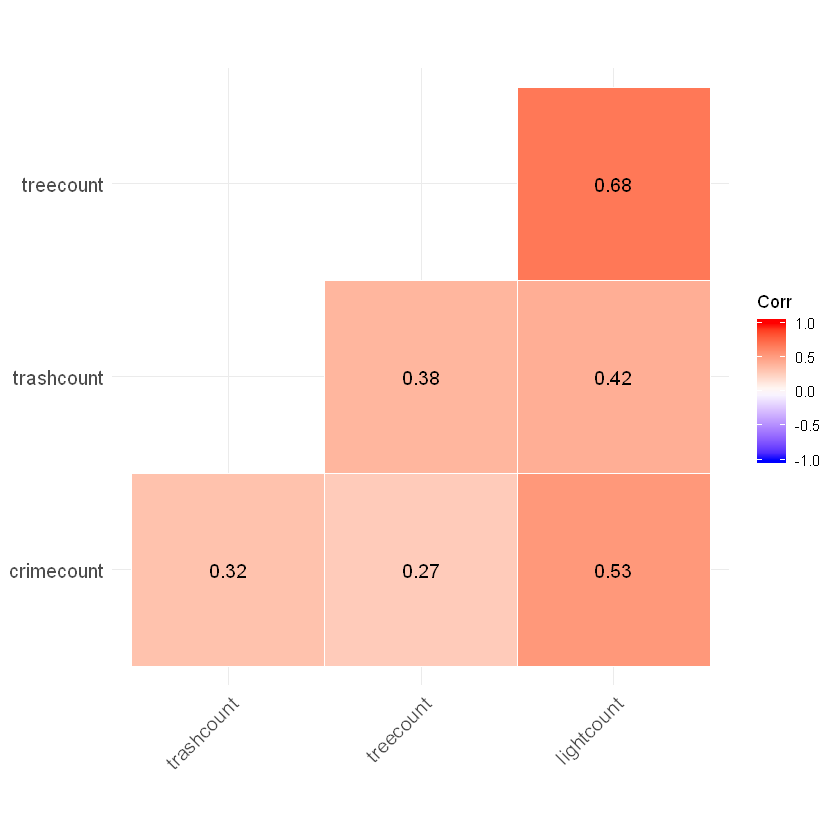

In [177]:
corr <- round(cor(SF_LA_PH_DC_prcnts_vars[, c('treecount','crimecount','lightcount','trashcount')]), 2)
ggcorrplot(corr, type = "lower", hc.order = TRUE, outline.color = "white", lab = TRUE) #method = 'circle'

ggsave('graphics/AllCities/AllCities_corr.png') 

Saving 6.67 x 6.67 in image


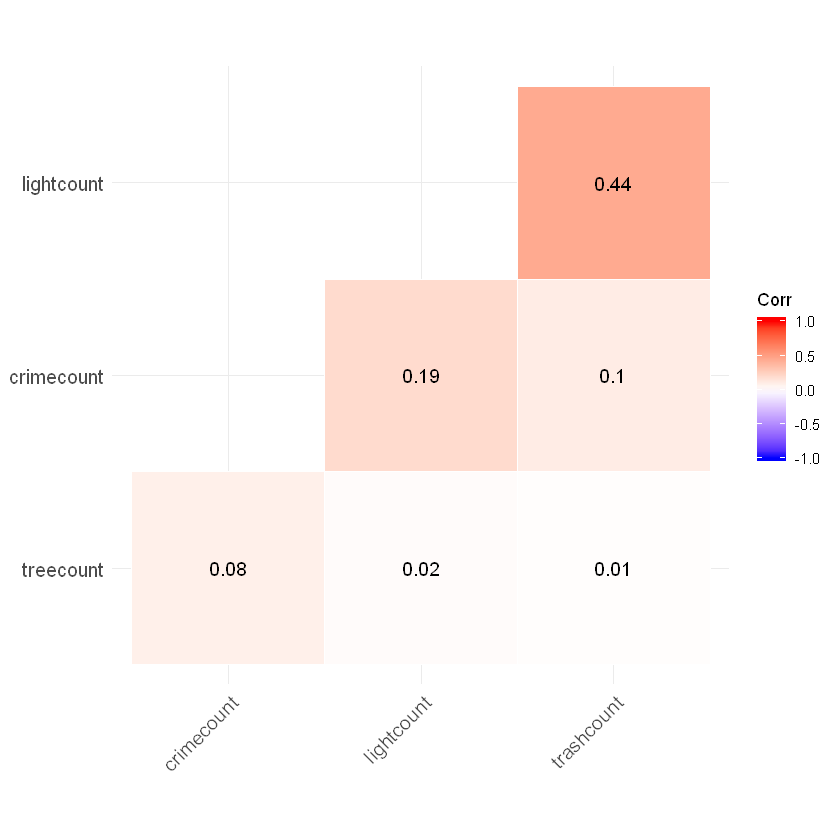

In [185]:
SF <- (subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY == "San Francisco"))
corr <- round(cor(SF[, c('treecount','crimecount','lightcount','trashcount')]), 2)
ggcorrplot(corr, type = "lower", hc.order = TRUE, outline.color = "white", lab = TRUE) #method = 'circle'

ggsave('graphics/SF/SF_corr.png') 

Saving 6.67 x 6.67 in image


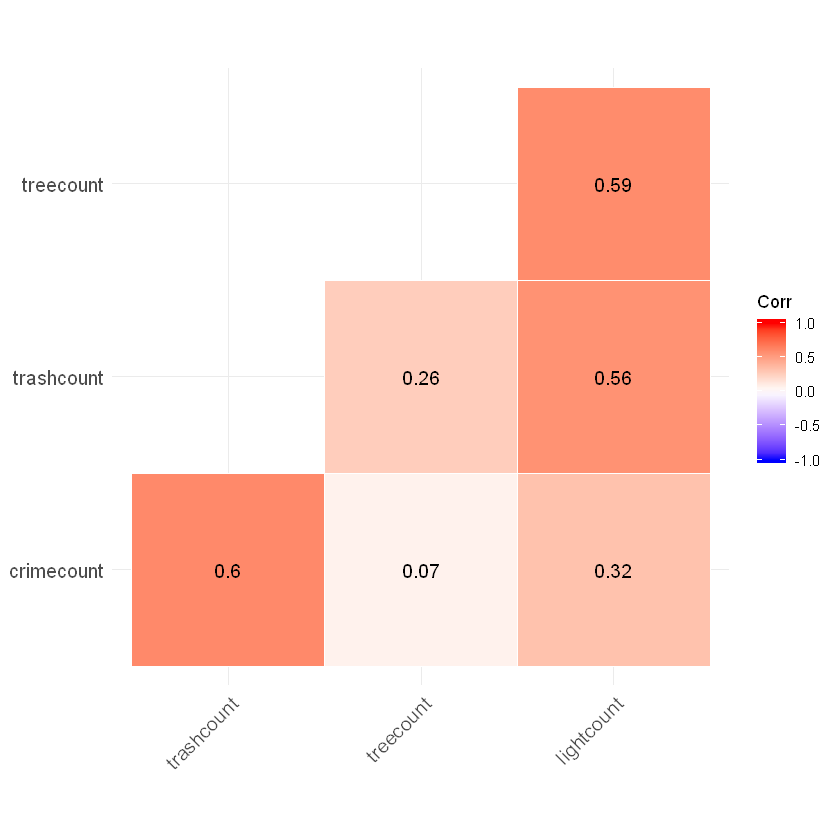

In [186]:
SF <- (subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY == "Los Angeles"))
corr <- round(cor(SF[, c('treecount','crimecount','lightcount','trashcount')]), 2)
ggcorrplot(corr, type = "lower", hc.order = TRUE, outline.color = "white", lab = TRUE) #method = 'circle'

ggsave('graphics/LA/LA_corr.png') 

Saving 6.67 x 6.67 in image


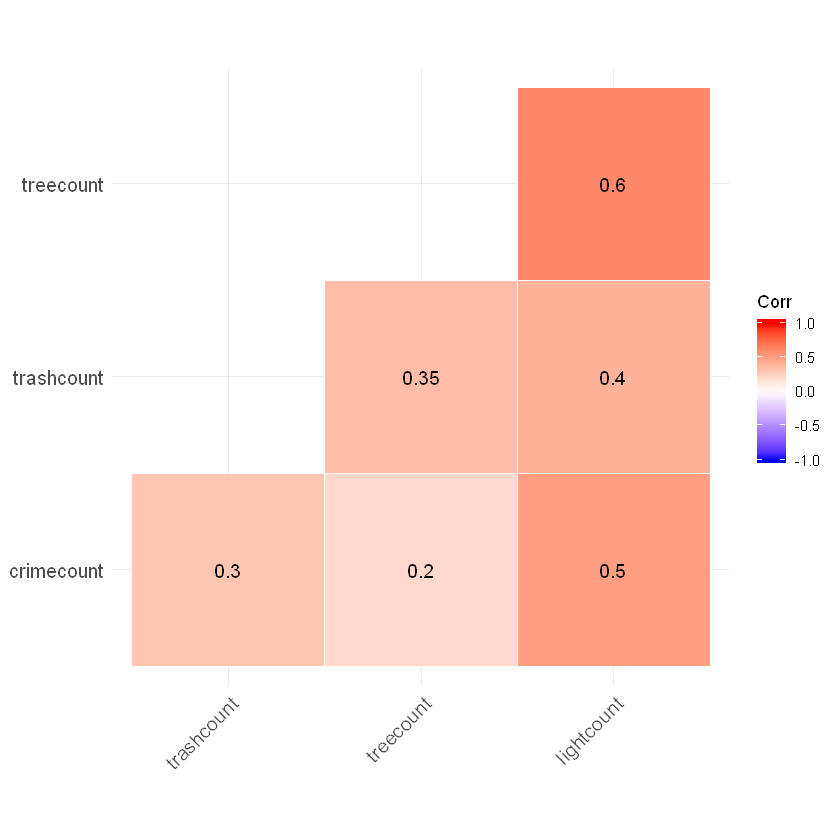

In [187]:
SF <- (subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY == "Philadelphia"))
corr <- round(cor(SF[, c('treecount','crimecount','lightcount','trashcount')]), 2)
ggcorrplot(corr, type = "lower", hc.order = TRUE, outline.color = "white", lab = TRUE) #method = 'circle'

ggsave('graphics/PH/PH_corr.png') 

Saving 6.67 x 6.67 in image


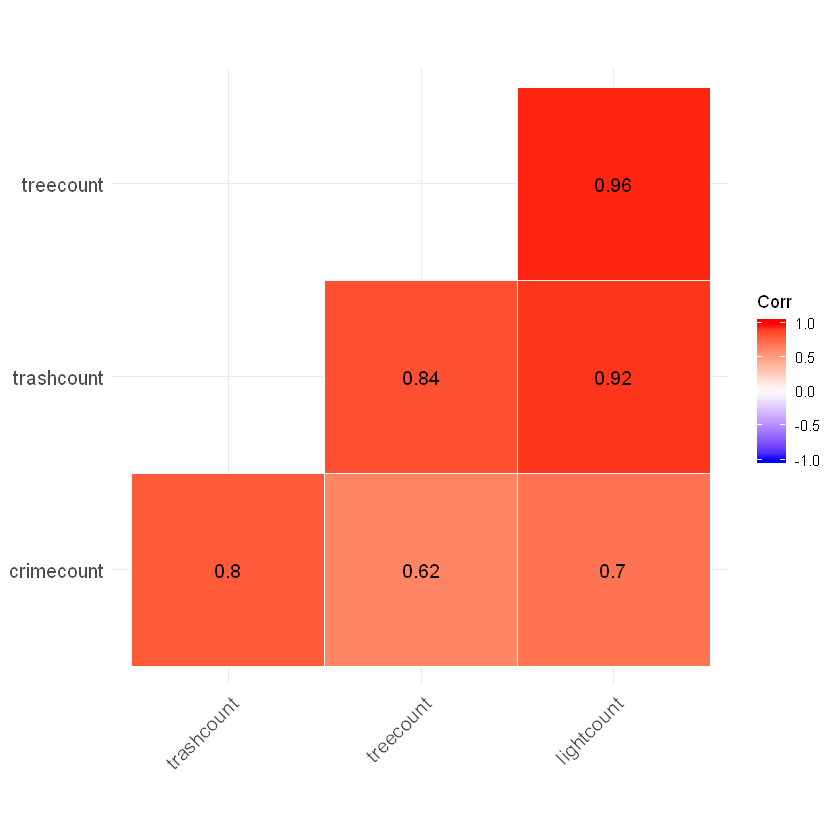

In [188]:
SF <- (subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY == "Washington DC"))
corr <- round(cor(SF[, c('treecount','crimecount','lightcount','trashcount')]), 2)
ggcorrplot(corr, type = "lower", hc.order = TRUE, outline.color = "white", lab = TRUE) #method = 'circle'

ggsave('graphics/DC/DC_corr.png') 

Saving 6.67 x 6.67 in image


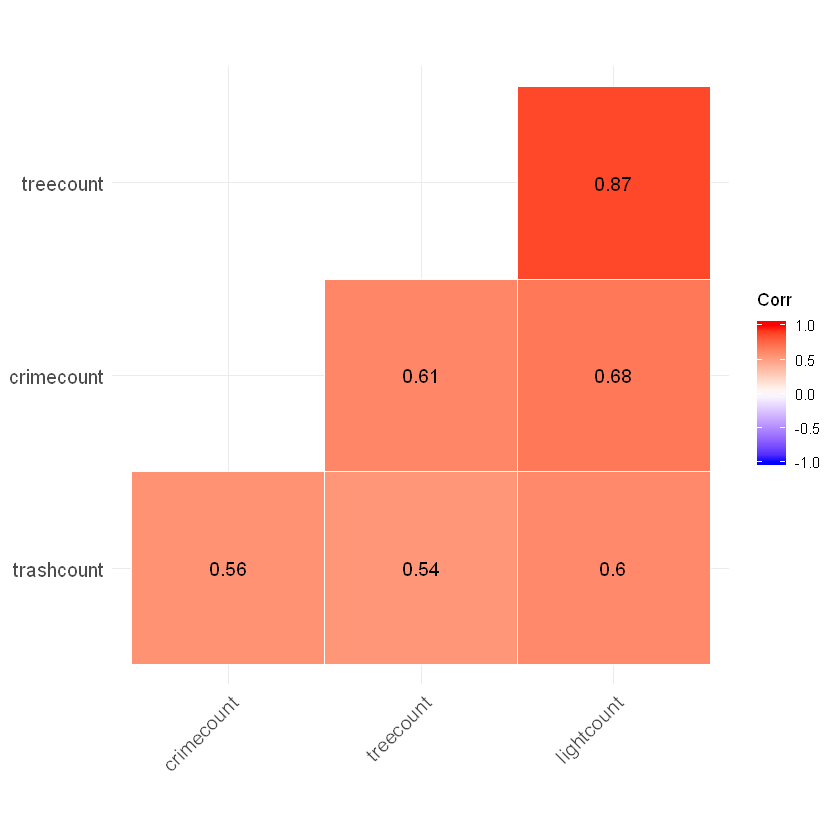

In [189]:
SF <- (subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY == "Boston"))
corr <- round(cor(SF[, c('treecount','crimecount','lightcount','trashcount')]), 2)
ggcorrplot(corr, type = "lower", hc.order = TRUE, outline.color = "white", lab = TRUE) #method = 'circle'

ggsave('graphics/BO/BO_corr.png') 